In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('bmh')

plt.rcParams.update({'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsmath}',
                     'legend.fontsize': 'x-large',
                     'axes.labelsize': 'x-large',
                     'axes.labelweight': 'heavy',
                     'axes.titlesize':'x-large',
                     'xtick.labelsize':'x-large',
                     'ytick.labelsize':'x-large'
                    })

import numpy as np
import pandas as pd
import uproot4 as up
import matplotlib.gridspec as gridspec

COLOR_BLUE='#348ABD'
COLOR_RED='#A60628'



print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
N1440P11 = [
    {'q2' : 0.30, 'a12': -19.8, 'err_a12': 4.6, 's12' : 34.7, 'err_s12': 3.3},
    {'q2' : 0.40, 'a12': -14.6, 'err_a12': 5.5, 's12' : 32.5, 'err_s12': 3.1},
    {'q2' : 0.50, 'a12':   3.0, 'err_a12': 7.9, 's12' : 33.8, 'err_s12': 3.7},
    {'q2' : 0.65, 'a12':  12.4, 'err_a12': 7.4, 's12' : 31.4, 'err_s12': 4.4},
    {'q2' : 0.90, 'a12':  25.3, 'err_a12': 7.9, 's12' : 33.4, 'err_s12': 5.1},
    {'q2' : 1.72, 'a12':  65.5, 'err_a12': 8.3, 's12' : 25.8, 'err_s12': 5.5},
    {'q2' : 2.05, 'a12':  67.4, 'err_a12': 6.0, 's12' : 18.2, 'err_s12': 5.8},
    {'q2' : 2.44, 'a12':  53.1, 'err_a12': 4.6, 's12' : 10.6, 'err_s12': 4.5},
    {'q2' : 2.91, 'a12':  40.0, 'err_a12': 3.9, 's12' : 11.8, 'err_s12': 3.3},
    {'q2' : 3.48, 'a12':  31.1, 'err_a12': 3.2, 's12' :  9.1, 'err_s12': 5.5},
    {'q2' : 4.16, 'a12':  21.2, 'err_a12': 4.9, 's12' : 14.1, 'err_s12': 6.1},
]
    
    
N1535S11 = [
    {'q2' : 0.30, 'a12': 90.2, 'err_a12': 1.7, 's12' : -12.0, 'err_s12': 1.8},
    {'q2' : 0.40, 'a12': 91.8, 'err_a12': 2.1, 's12' : -12.7, 'err_s12': 3.6},
    {'q2' : 0.50, 'a12': 91.1, 'err_a12': 2.2, 's12' : -13.8, 'err_s12': 3.5},
    {'q2' : 0.65, 'a12': 90.8, 'err_a12': 2.7, 's12' : -13.6, 'err_s12': 1.8},
    {'q2' : 0.90, 'a12': 84.4, 'err_a12': 5.2, 's12' : -13.8, 'err_s12': 5.5},
    {'q2' : 1.72, 'a12': 73.9, 'err_a12': 5.2, 's12' : -22.6, 'err_s12': 4.0},
    {'q2' : 2.05, 'a12': 62.6, 'err_a12': 4.9, 's12' : -17.4, 'err_s12': 4.9},
    {'q2' : 2.44, 'a12': 57.2, 'err_a12': 4.6, 's12' : -14.0, 'err_s12': 5.0},
    {'q2' : 2.91, 'a12': 51.3, 'err_a12': 4.6, 's12' : -10.8, 'err_s12': 4.0},
    {'q2' : 3.48, 'a12': 43.0, 'err_a12': 4.8, 's12' :  -8.8, 'err_s12': 3.7},
    {'q2' : 4.16, 'a12': 33.7, 'err_a12': 4.9, 's12' :  -6.7, 'err_s12': 4.3},
]


In [3]:
df = pd.DataFrame(N1440P11)
df2 = pd.DataFrame(N1535S11)
df.head()

,q2,a12,err_a12,s12,err_s12
0,0.30,-19.8,4.6,34.7,3.3
1,0.40,-14.6,5.5,32.5,3.1
2,0.50,3.0,7.9,33.8,3.7
3,0.65,12.4,7.4,31.4,4.4
4,0.90,25.3,7.9,33.4,5.1


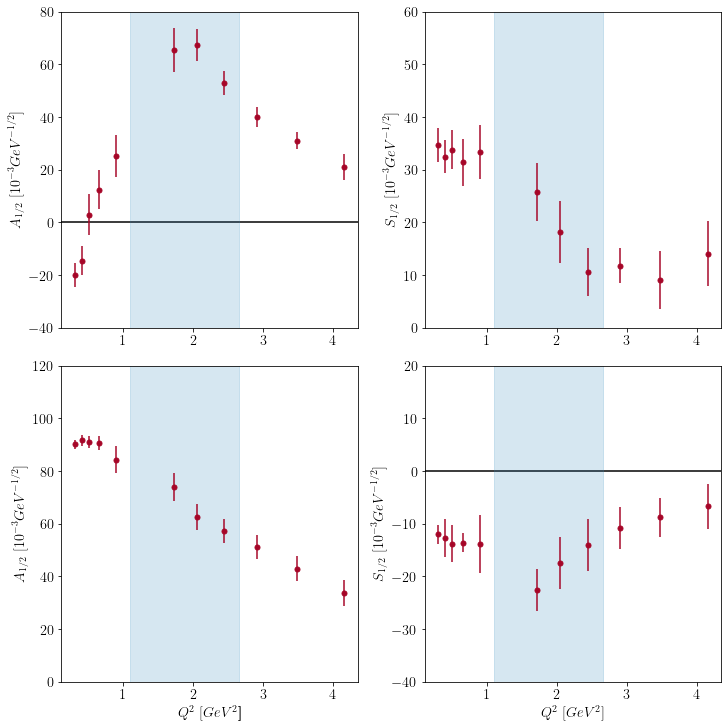

In [4]:
fig = plt.figure(constrained_layout=True, figsize=[10,10])
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1], sharex=ax1)
ax3 = fig.add_subplot(spec[1, 0], sharex=ax1)
ax4 = fig.add_subplot(spec[1, 1], sharex=ax1)


xs = np.linspace(1.1, 2.66, 20)
ys_min = -np.ones_like(xs)*150
ys_max = np.ones_like(xs)*150


ax1.errorbar(df.q2, df.a12, yerr=df.err_a12, fmt='.', ms=10, color=COLOR_RED, label="")
ax1.set_ylabel("$A_{1/2}~[10^{-3} GeV^{-1/2}]$")
#ax1.set_xlabel("$Q^{2}~GeV^{2}$")
ax1.axhline(0, c='k', zorder=0)
ax1.set_ylim(-40,80)

ax2.errorbar(df.q2, df.s12, yerr=df.err_s12, fmt='.', ms=10, color=COLOR_RED)
ax2.set_ylabel("$S_{1/2}~[10^{-3} GeV^{-1/2}]$")
#ax2.axhline(0, c='k')
ax2.set_ylim(0, 60)


ax3.errorbar(df2.q2, df2.a12, yerr=df2.err_a12, fmt='.', ms=10, color=COLOR_RED)
ax3.set_ylabel("$A_{1/2}~[10^{-3} GeV^{-1/2}]$")
ax3.set_xlabel("$Q^{2}~[GeV^{2}$]")
ax3.set_ylim(0, 120)

ax4.errorbar(df2.q2, df2.s12, yerr=df2.err_s12, fmt='.', ms=10, color=COLOR_RED)
ax4.set_ylabel("$S_{1/2}~[10^{-3} GeV^{-1/2}]$")
ax4.set_xlabel("$Q^{2}~[GeV^{2}]$")
ax4.axhline(0, c='k', zorder=0)
ax4.set_ylim(-40, 20)




ax1.fill_between(xs, ys_min, ys_max, alpha=0.2, color=COLOR_BLUE)
ax2.fill_between(xs, ys_min, ys_max, alpha=0.2, color=COLOR_BLUE)
ax3.fill_between(xs, ys_min, ys_max, alpha=0.2, color=COLOR_BLUE)
ax4.fill_between(xs, ys_min, ys_max, alpha=0.2, color=COLOR_BLUE)


plt.show()

Solarize_Light2


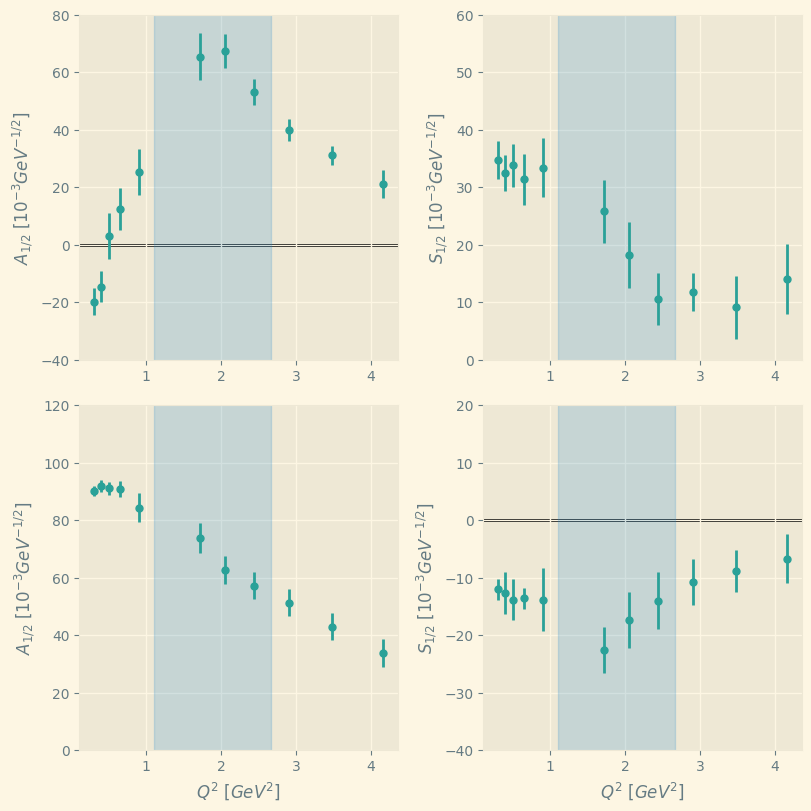

_classic_test_patch


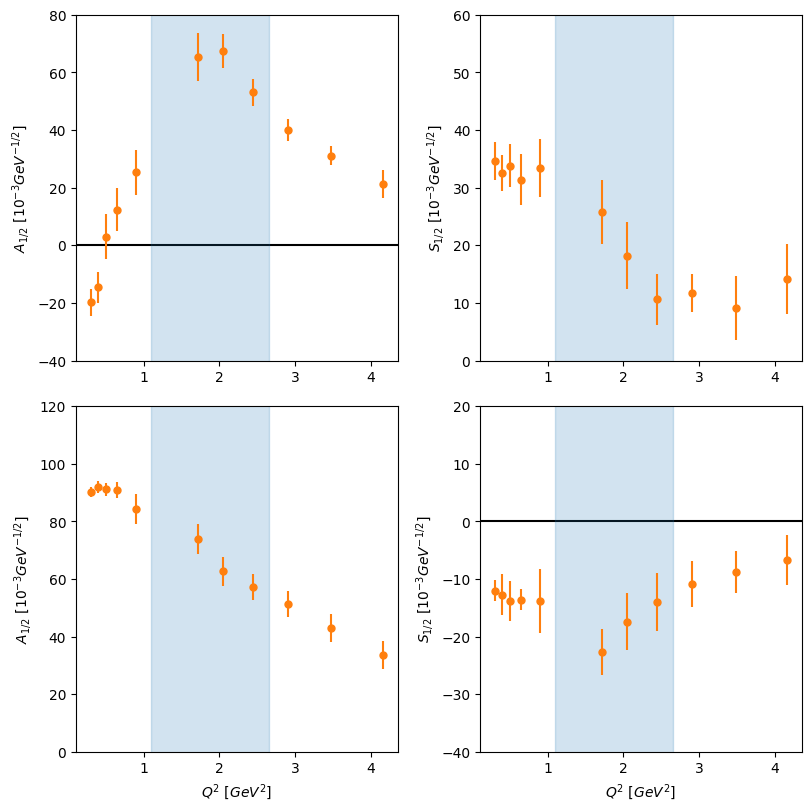

bmh


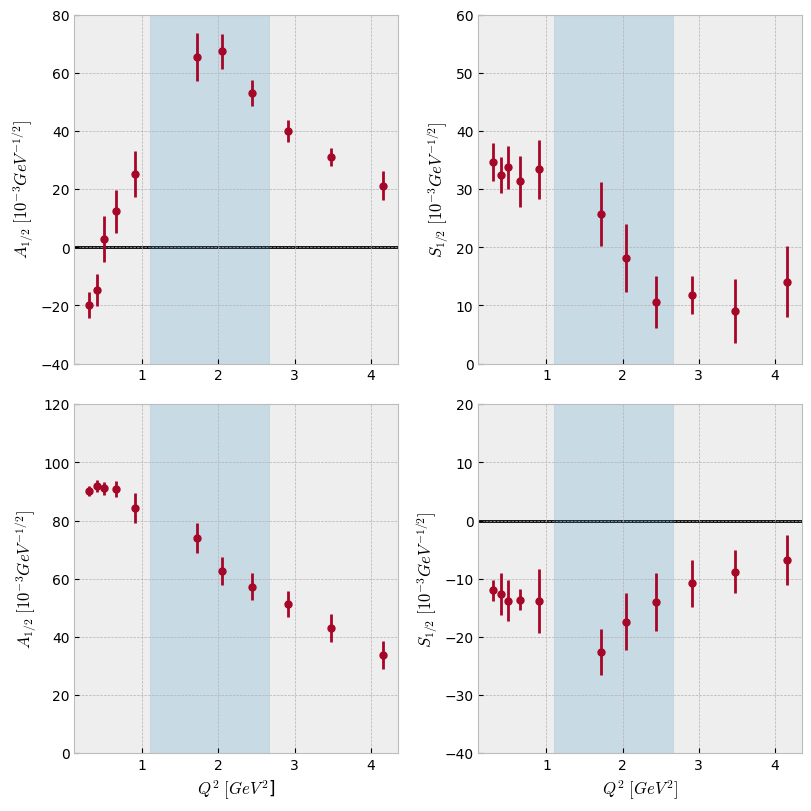

classic


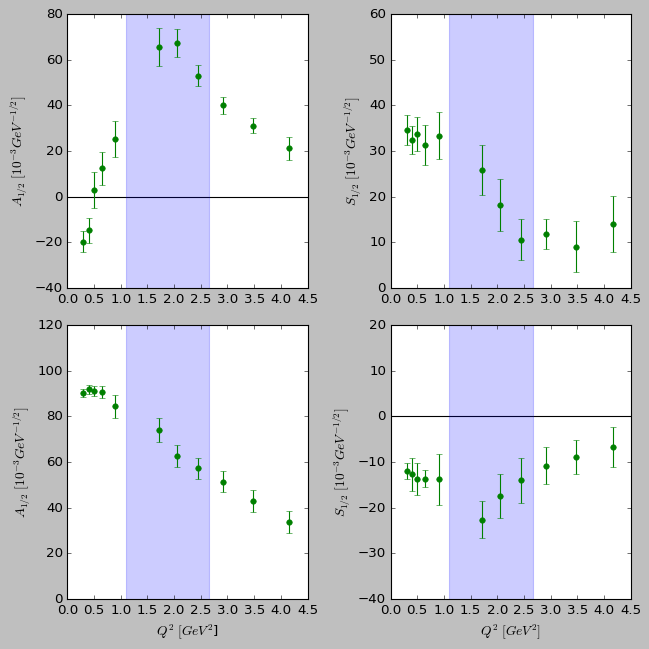

dark_background


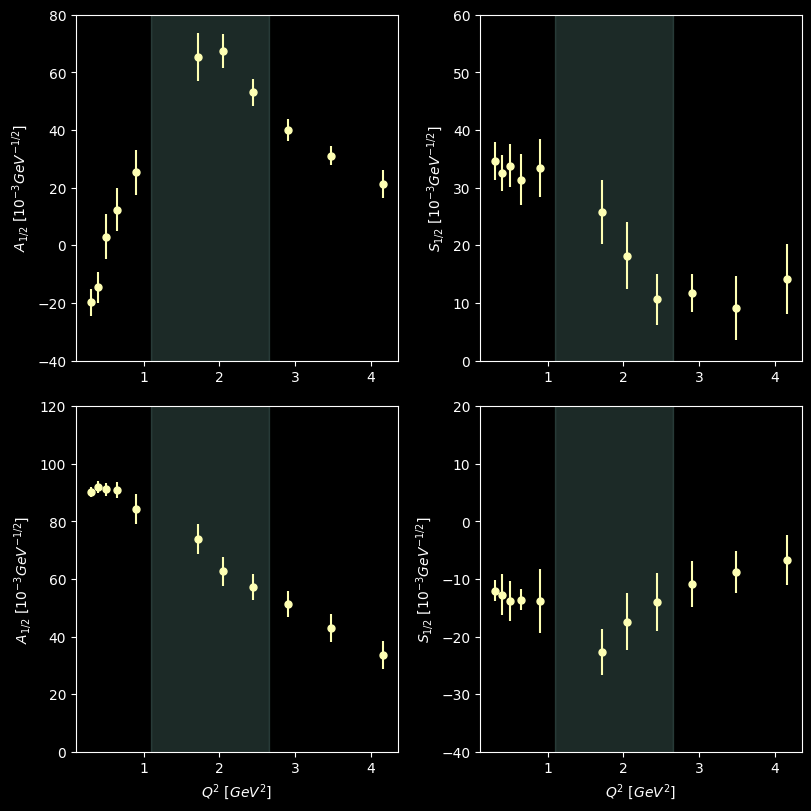

fast


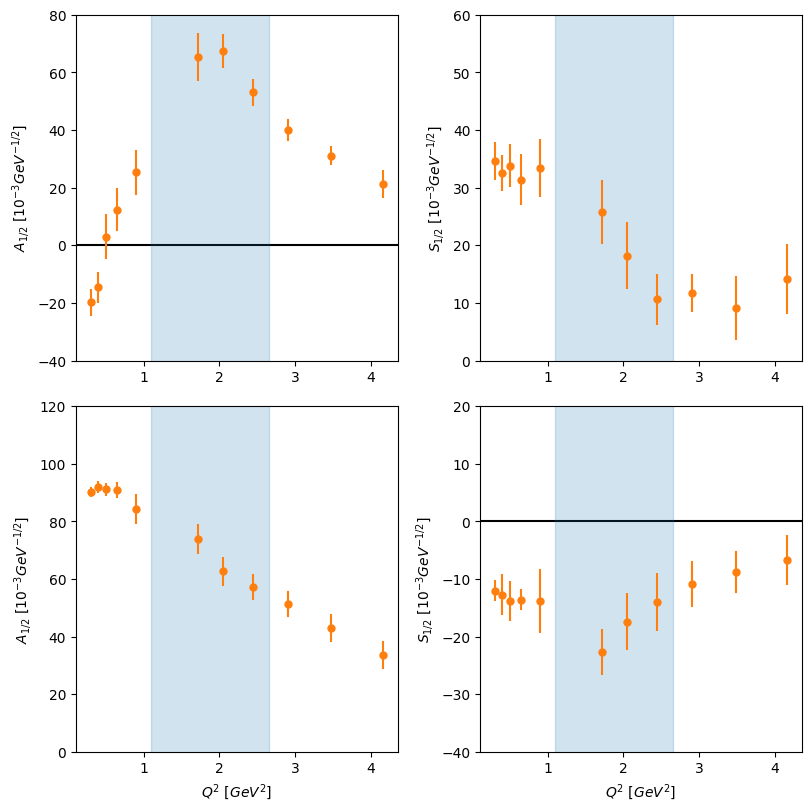

fivethirtyeight


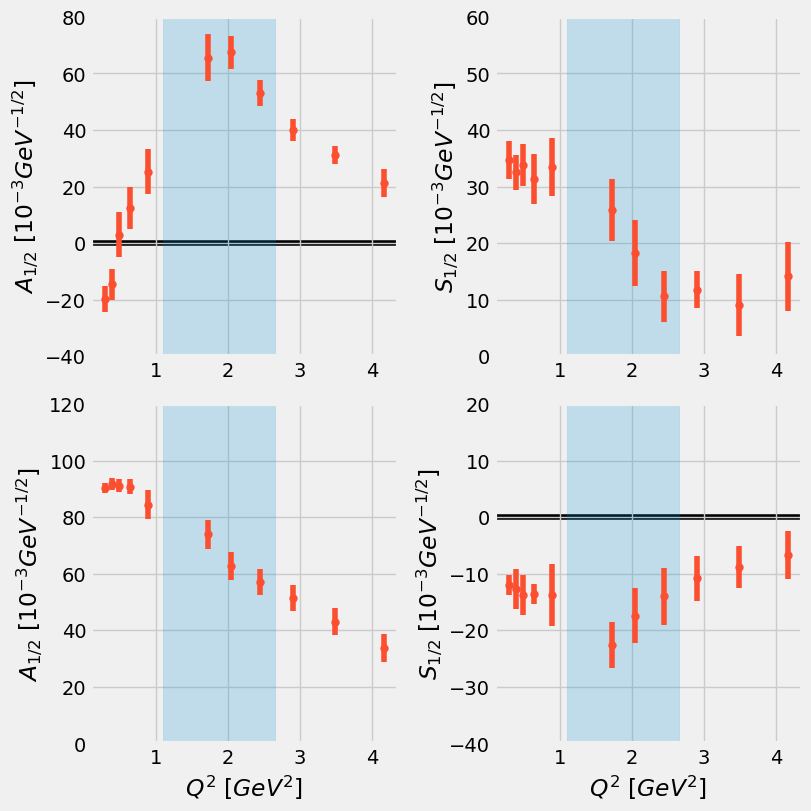

ggplot


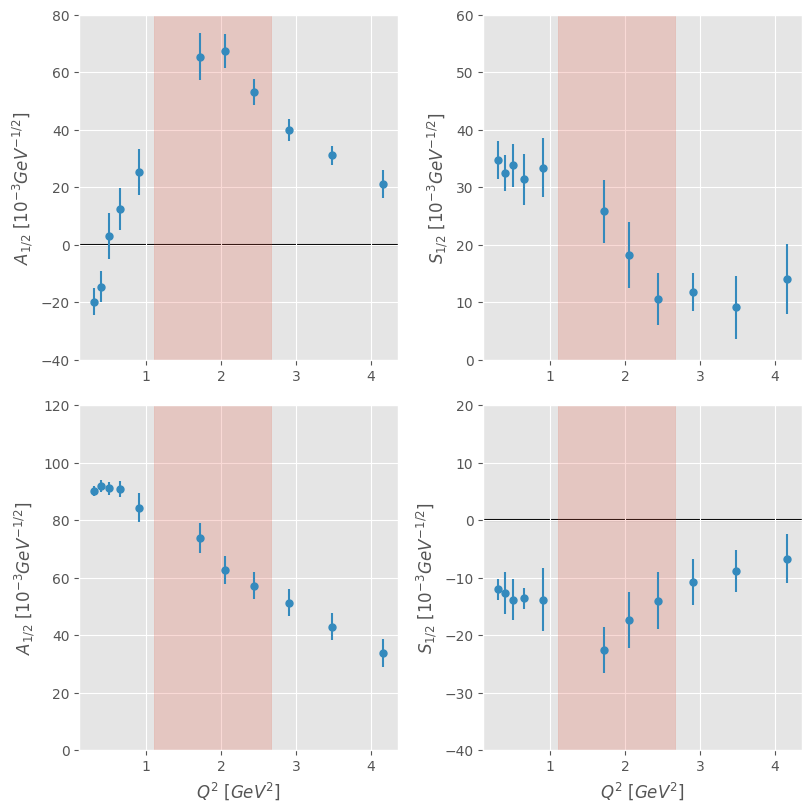

grayscale


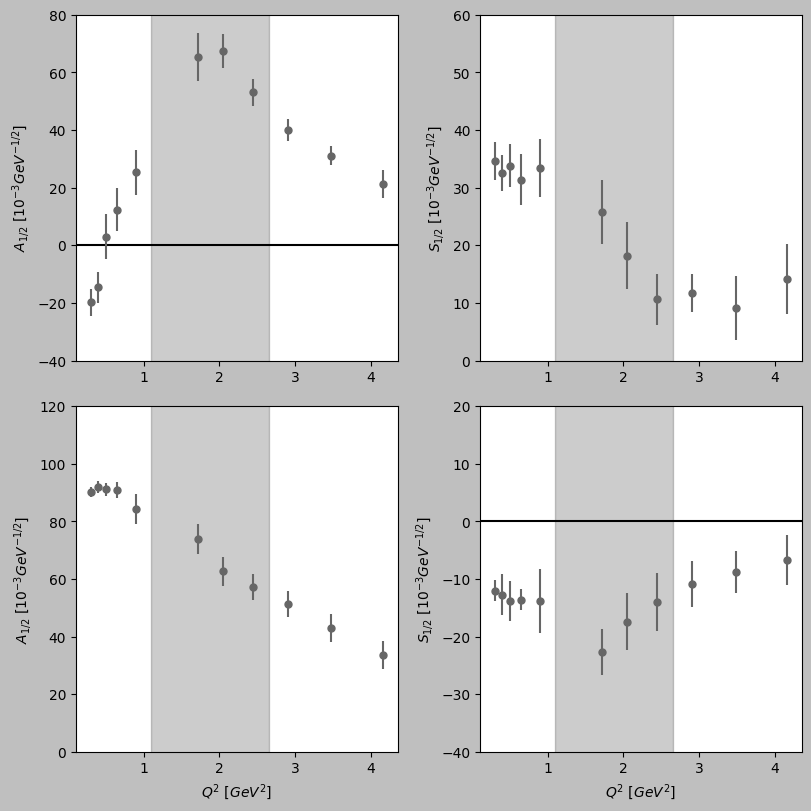

seaborn


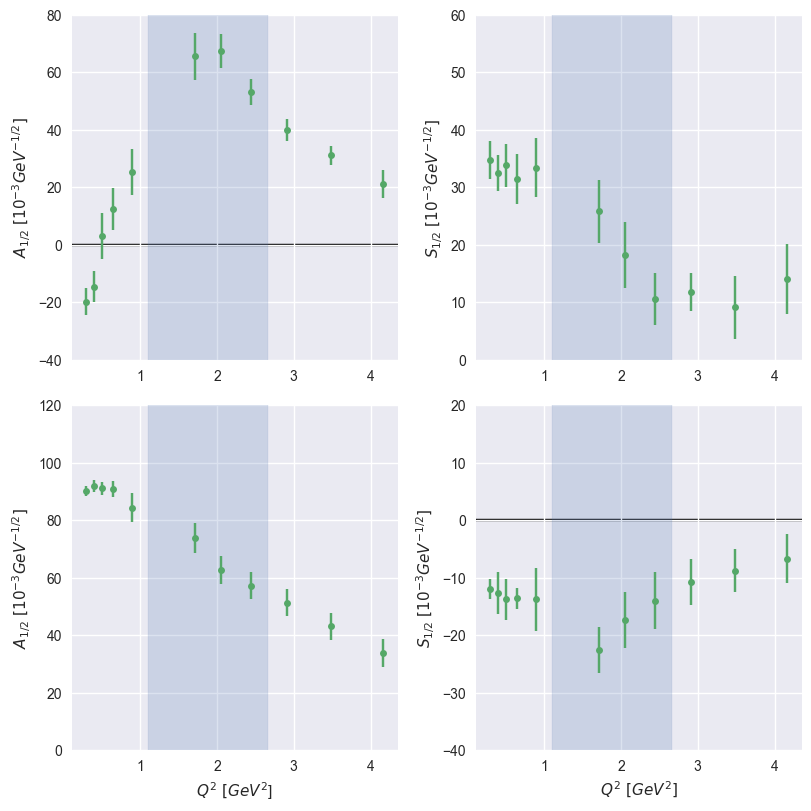

seaborn-bright


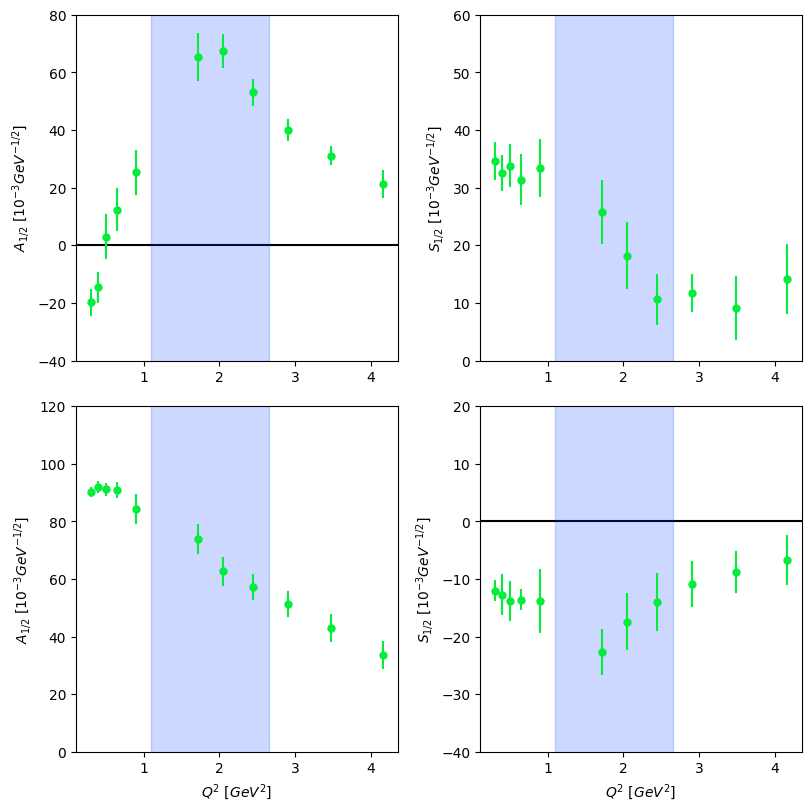

seaborn-colorblind


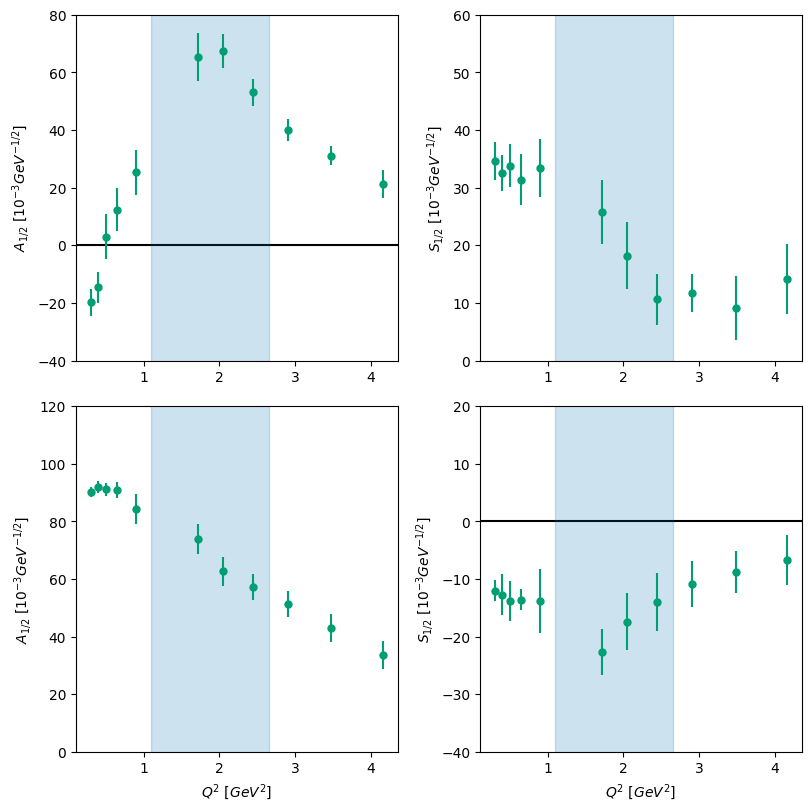

seaborn-dark


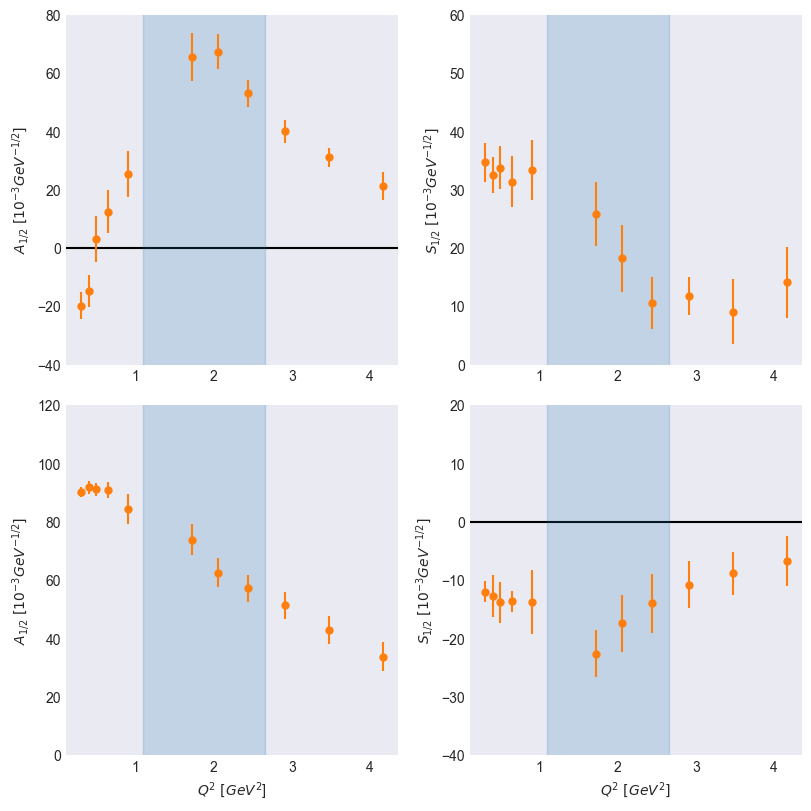

seaborn-dark-palette


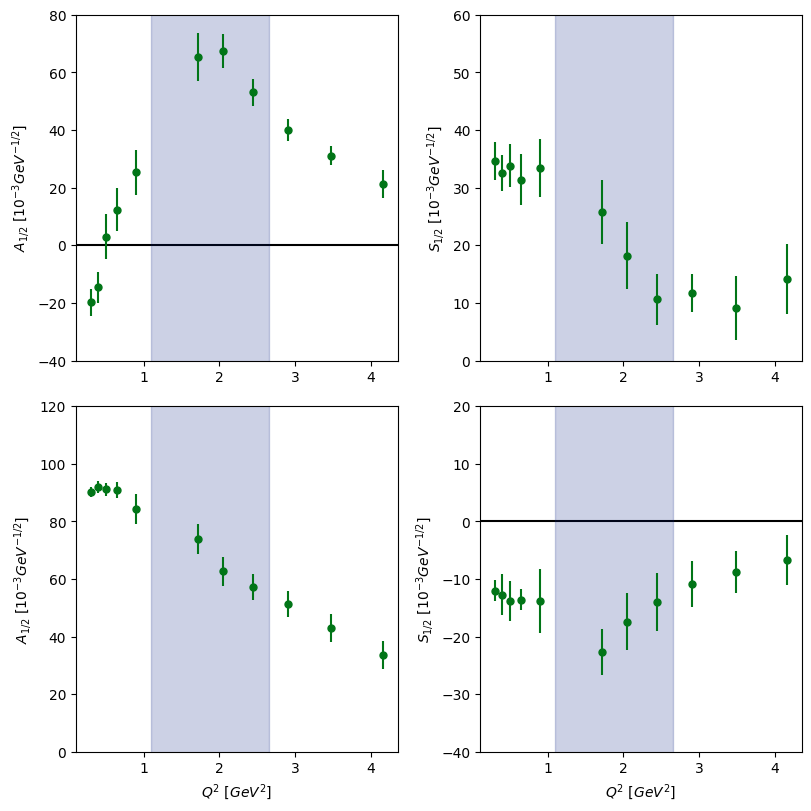

seaborn-darkgrid


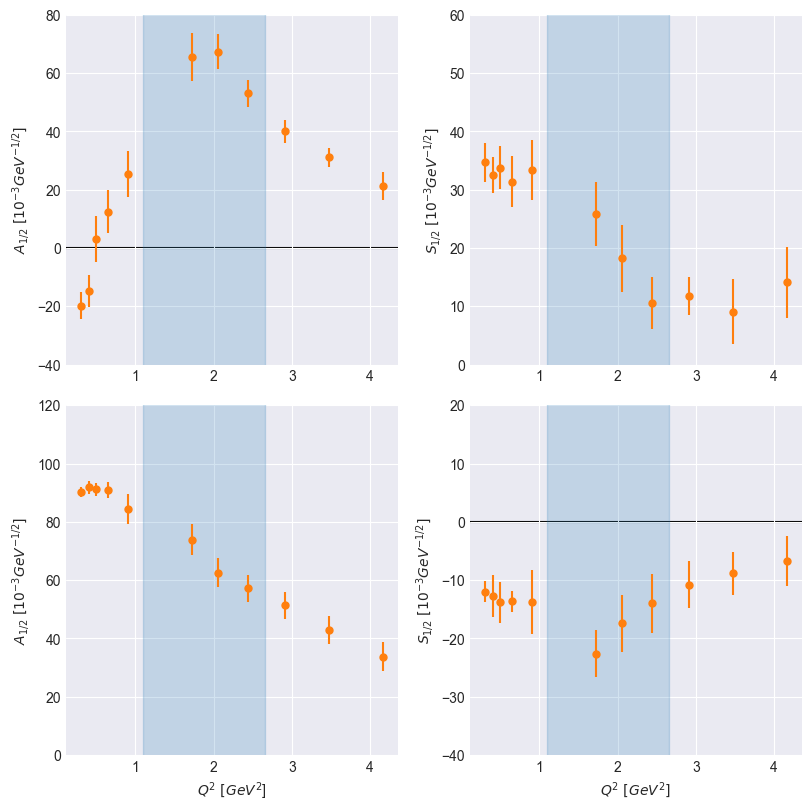

seaborn-deep


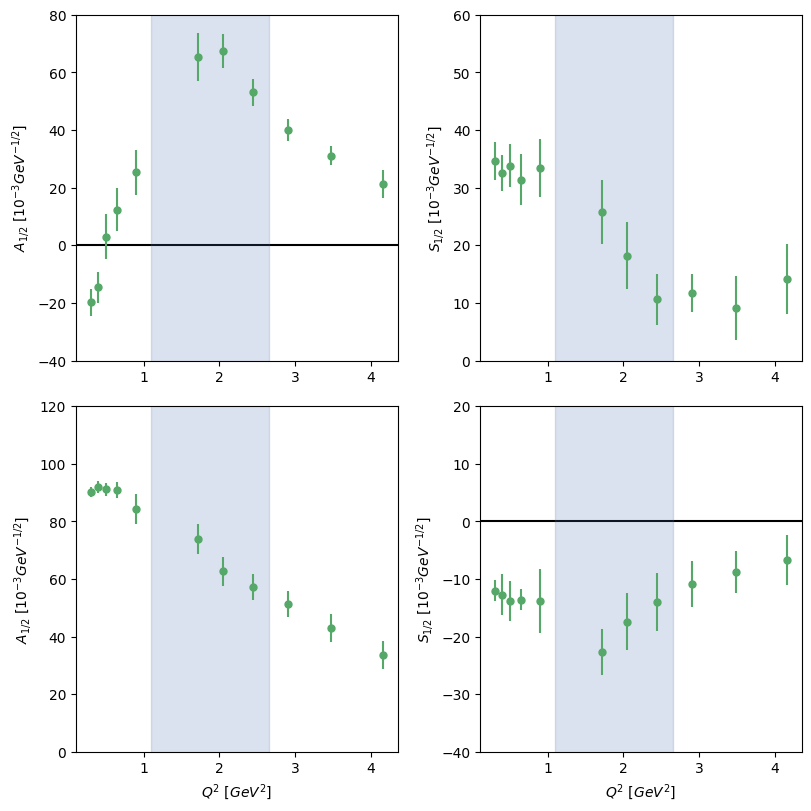

seaborn-muted


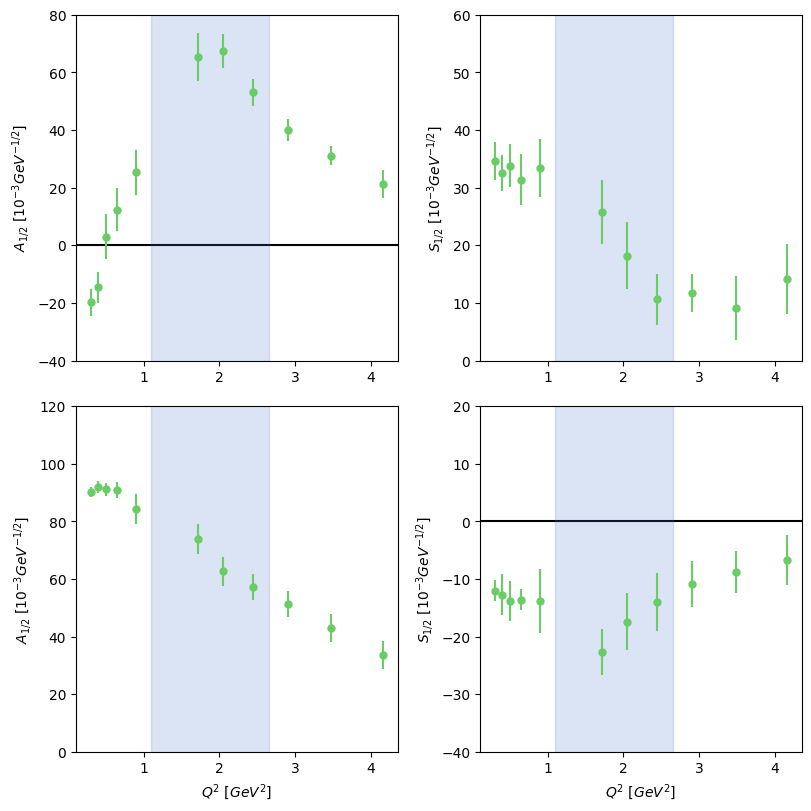

seaborn-notebook


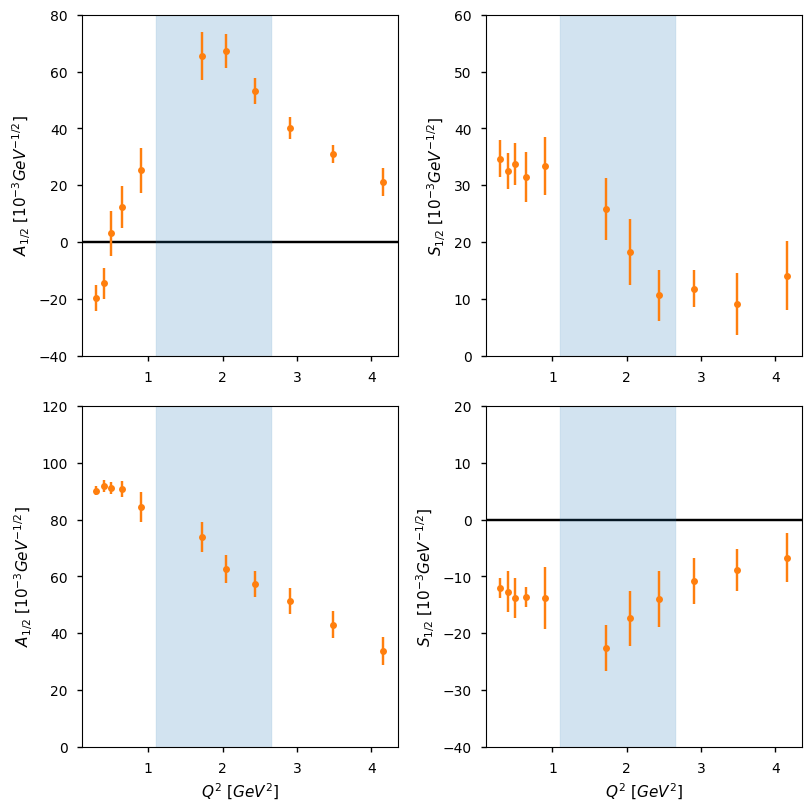

seaborn-paper


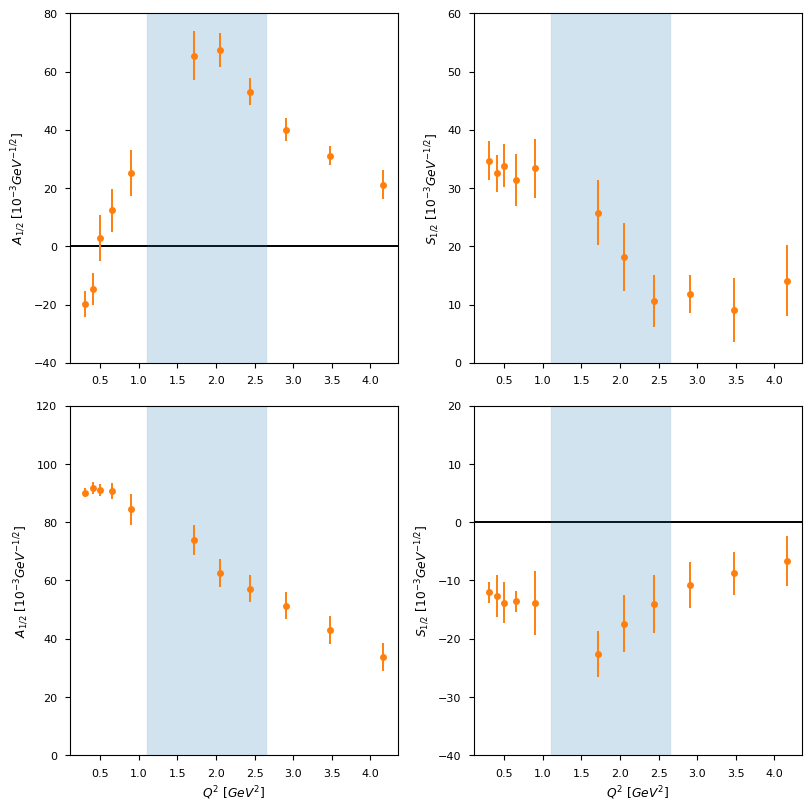

seaborn-pastel


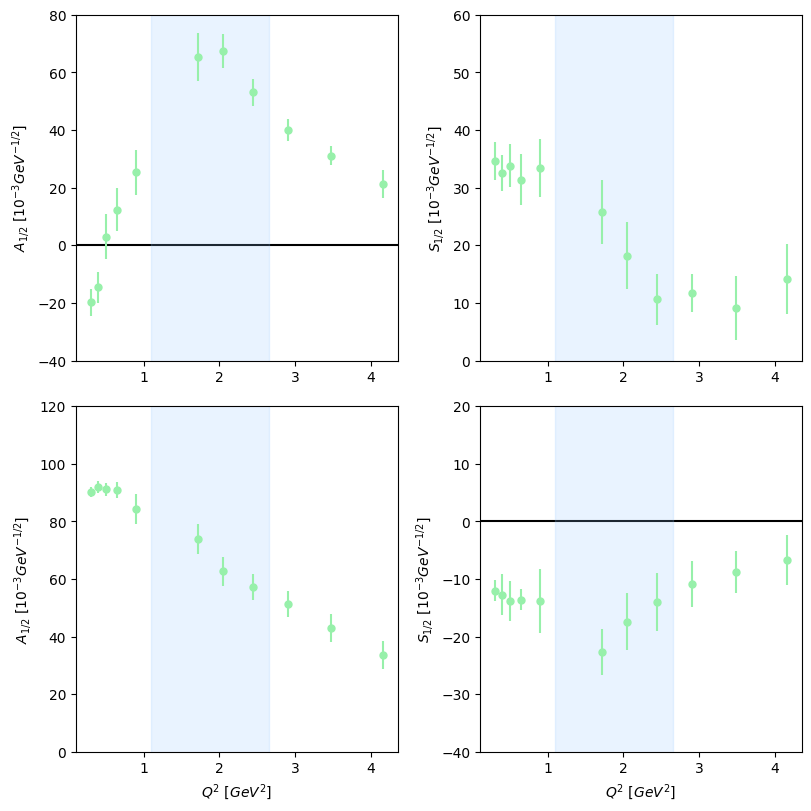

seaborn-poster


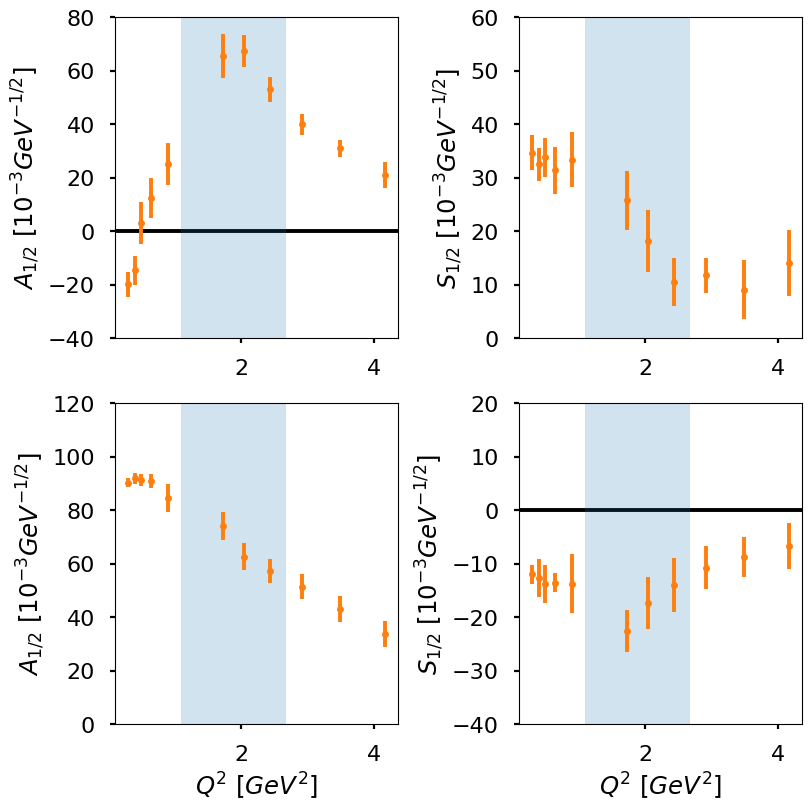

seaborn-talk


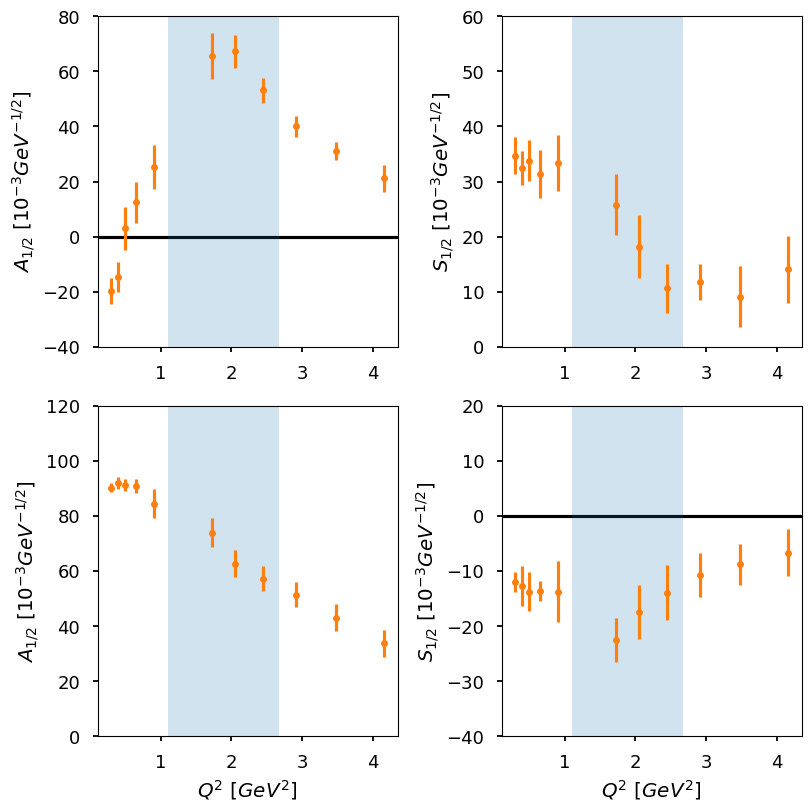

seaborn-ticks


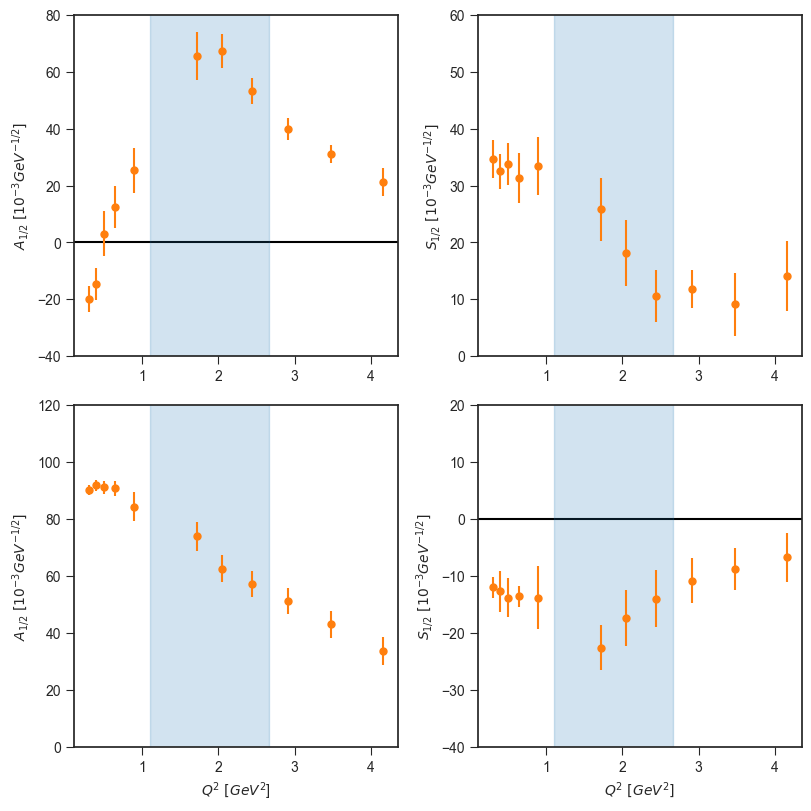

seaborn-white


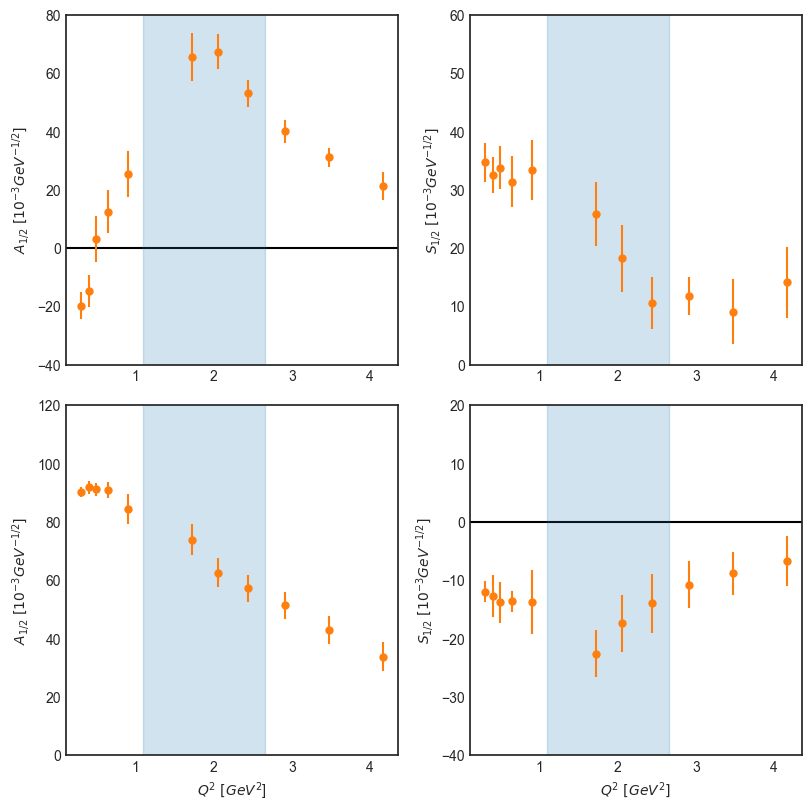

seaborn-whitegrid


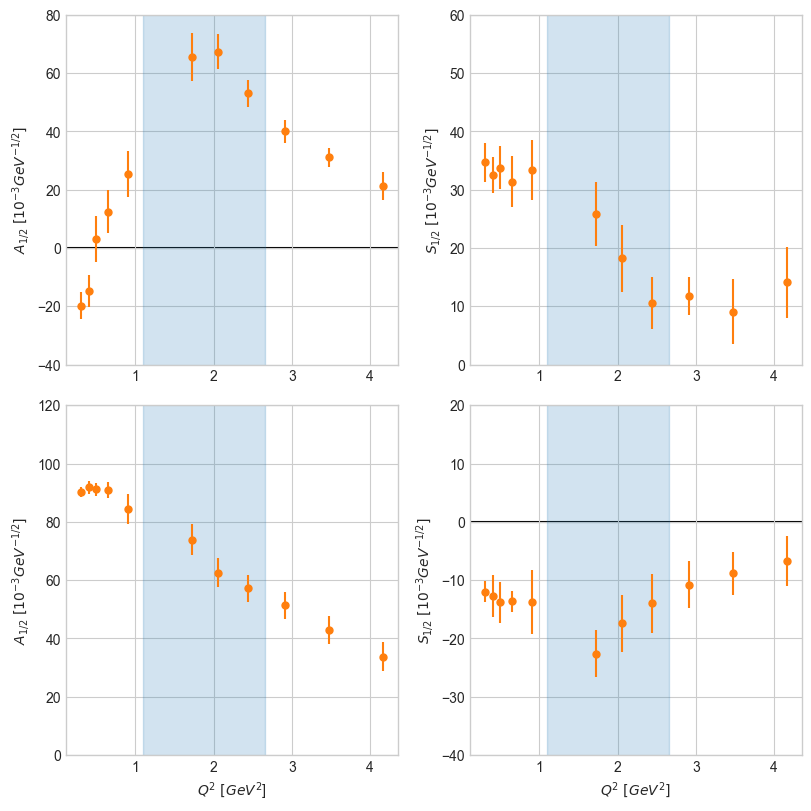

tableau-colorblind10


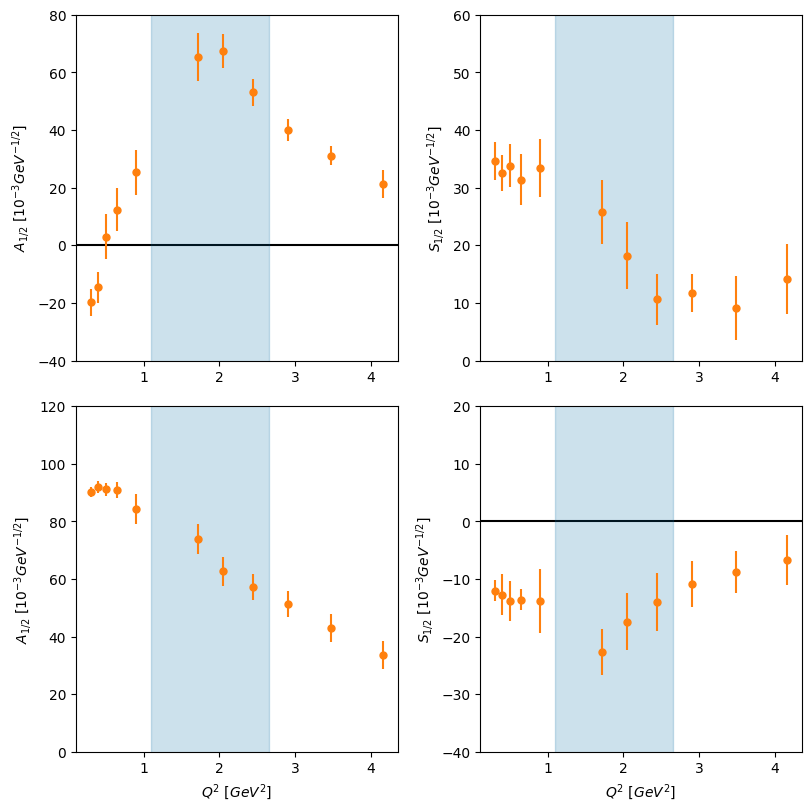

In [5]:
for style in plt.style.available:
    plt.style.use('default')
    print(style)
    plt.style.use(style)
    
    COLOR_BLUE = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
    COLOR_RED = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
    
    fig = plt.figure(constrained_layout=True, figsize=[8,8])
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig, wspace=0.1, hspace=0.1)
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = fig.add_subplot(spec[0, 1], sharex=ax1)
    ax3 = fig.add_subplot(spec[1, 0], sharex=ax1)
    ax4 = fig.add_subplot(spec[1, 1], sharex=ax1)


    xs = np.linspace(1.1, 2.66, 20)
    ys_min = -np.ones_like(xs)*150
    ys_max = np.ones_like(xs)*150


    ax1.errorbar(df.q2, df.a12, yerr=df.err_a12, fmt='.', ms=10, color=COLOR_RED)
    ax1.set_ylabel("$A_{1/2}~[10^{-3} GeV^{-1/2}]$")
    #ax1.set_xlabel("$Q^{2}~GeV^{2}$")
    ax1.axhline(0, c='k', zorder=0)
    ax1.set_ylim(-40,80)

    ax2.errorbar(df.q2, df.s12, yerr=df.err_s12, fmt='.', ms=10, color=COLOR_RED)
    ax2.set_ylabel("$S_{1/2}~[10^{-3} GeV^{-1/2}]$")
    #ax2.axhline(0, c='k')
    ax2.set_ylim(0, 60)


    ax3.errorbar(df2.q2, df2.a12, yerr=df2.err_a12, fmt='.', ms=10, color=COLOR_RED)
    ax3.set_ylabel("$A_{1/2}~[10^{-3} GeV^{-1/2}]$")
    ax3.set_xlabel("$Q^{2}~[GeV^{2}$]")
    ax3.set_ylim(0, 120)

    ax4.errorbar(df2.q2, df2.s12, yerr=df2.err_s12, fmt='.', ms=10, color=COLOR_RED)
    ax4.set_ylabel("$S_{1/2}~[10^{-3} GeV^{-1/2}]$")
    ax4.set_xlabel("$Q^{2}~[GeV^{2}]$")
    ax4.axhline(0, c='k', zorder=0)
    ax4.set_ylim(-40, 20)




    ax1.fill_between(xs, ys_min, ys_max, alpha=0.2, color=COLOR_BLUE)
    ax2.fill_between(xs, ys_min, ys_max, alpha=0.2, color=COLOR_BLUE)
    ax3.fill_between(xs, ys_min, ys_max, alpha=0.2, color=COLOR_BLUE)
    ax4.fill_between(xs, ys_min, ys_max, alpha=0.2, color=COLOR_BLUE)

    plt.show()
    